# Errors and Bugs

Problems with code are as old as computer programming itself. Though in general terms everything that goes wrong is called a "bug", I prefer to make the distinction between a _coding error_, and _bug in the code_. Of these two, the _coding errors_ are the easier to find and fix.

### Syntax Errors

Coding errors are situations in which you wrote a bit of code that the compiler or interpreter cannot understand because there is a problem with the _syntax_ of the code. The resulting code is invalid, and because of that it will not compile or run. For _compiled code_ (Java, C/C++, Fortran...), the compiler will tell you that there is an error, and usually will give some indication of where this error is. For _interpreted code_ (Python, Bash...) the error cannot be found until the specific bit of code with the error in it is being read by the interpreter. That happens when you try to run the code, or when the IDE (Spyder, Eclipse...) is trying to make sense of the code. This is one of the advantages of using an IDE. As you can see in the image below, Spyder shows a yellow triangle in the margin of the code window and if you hover your mouse over the triangle, you see a hint about the issue. If you press the green run button (triangle) then the _console_ area shows you the output you would have gotten when you run this code through the interpreter.

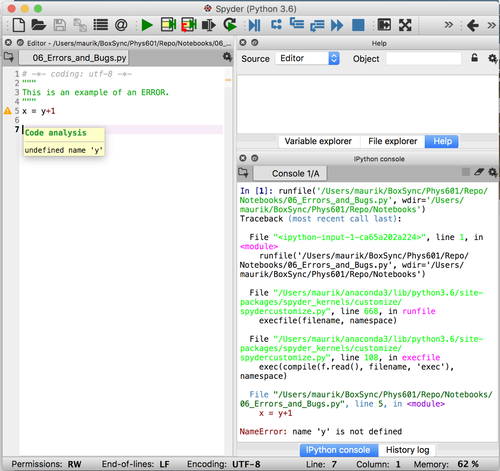

In [1]:
from IPython.display import Image
Image(filename="images/spyder_error_sm.png")

In a Jupyter notebook, you get a slightly different looking error after you press shift-enter:

In [2]:
x = y+2

NameError: name 'y' is not defined

In both cases, the _error message_ tells you: "name 'y' is not defined". So that means that you never defined what 'y' is, but you _are_ trying to use it. Python will not know what to do.

Here are some other common syntax errors, with examples in the code snippets below:
* SyntaxError: invalid syntax
* IndentationError: expected an indented block
* IndentationError: unexpected indent
   * TabError: inconsistent use of tabs and spaces in indentation
* ModuleNotFoundError: No module named 'numphy'
* TypeError: 'list' object is not callable
* TypeError: 'function' object is not subscriptable
* TypeError: list indices must be integers or slices, not float

Note that Jupyter converts tabs to spaces, you cannot get the "TabError: inconsistent use of tabs and spaces in indentation" in a notebook. This can happen when the editor you are using does not convert a tab into spaces, and you have some indentation as a tab, and some other indentation as spaces. 

Here are some additional references on _syntax errors_:
* [Errors](https://swcarpentry.github.io/python-novice-inflammation/07-errors/)

In [3]:
def myfunction(input)
    return(input**3)

SyntaxError: invalid syntax (<ipython-input-3-5b6f1c728b39>, line 1)

In [4]:
def myfunction(input):
return(input**3)

IndentationError: expected an indented block (<ipython-input-4-9f2955da35fd>, line 2)

In [5]:
def myfunction(input):
    out=input**3
     return(out)

IndentationError: unexpected indent (<ipython-input-5-105d802deadc>, line 3)

In [6]:
import numphy as np

ModuleNotFoundError: No module named 'numphy'

In [7]:
import Numpy as np

ModuleNotFoundError: No module named 'Numpy'

In [8]:
xlist = [1.,2.,3.]
xlist(0)

TypeError: 'list' object is not callable

In [9]:
def myfunction(input):
    out=input**3
    return(out)
myfunction[4]

TypeError: 'function' object is not subscriptable

In [11]:
xlist[1.]

TypeError: list indices must be integers or slices, not float

Hints on what went wrong:
3. The colon (:) was missing
4. After you start defining a function, you must indent the code.
5. You must indent code consistently.
6. Mis-spelling on numpy
7. Names of modules are case sensitive!
8. You get an item from the list using square brackets []
9. You call a function with round brackets ()
10. When you get an item from a list, you need to call with an integer.


## Bugs that crash the code

Code that looks OK at first glance, but then does not quite work as it is supposed to, has a _bug_. To get rid of such errors is called _debugging_. [Brian Kernighan](https://en.wikipedia.org/wiki/Brian_Kernighan) (a famous programmer) said:

`Everyone knows that debugging is twice as hard as writing a program in the first place. So if   you're as clever as you can be when you write it, how will you ever debug it?`

This is _still_ very true for programming, or anything else you create. Getting rid of bugs is simply quite a difficult task, in part because there are so many ways in which things can go wrong. 

The more obvious ways in which a program can go wrong are the bugs that cause a _crash_. Unlike C, which is infamous for the "segfault" crash, with Python a crash usually results in some output that will give you a hint as to what went wrong. Such coding problems are called _exceptions_. Sometimes these are just errors in the code, but often these are situations that were not anticipated when the code was written. Here is an example of a "divide by zero exception":

In [12]:
numer=123.
div=0.
division=numer/div

ZeroDivisionError: float division by zero

In this case, the fix is easy, just change the value of "div" to something more sensible. 

There is a long list of possible exceptions that Python knows about, and the error you get will always look something like the text above: Python prints the type of exception (here "ZeroDivisionError") and the location in the code (line 3). With  more complicated call, where one function called another, which called another, Python will also show you the trace of which function called which.

Here is a list of all the exceptions: [Exceptions] (https://docs.python.org/3/library/exceptions.html)

Most of the time you can figure out what went wrong pretty quickly from the error itself, or by looking up the definition of the exception.

### Catching Exceptions

You can have your code catch exceptions with the "try ... except: " syntax. You would want to do this, for instance, with user input or a file you read in, to make sure everything is legitimate. This is more complicated coding, which you can read about here: [Handling Exceptions](https://docs.python.org/3/tutorial/errors.html#handling-exceptions)

Here is an example:

In [35]:

try:
    mydict={'a':"Alpha"}
    numer=123.
    div=0.
    division=numer/div
    print("mydict: ",mydict['b'])
except ZeroDivisionError as err:   # This except catches only divide by zero.
    print("You cannot divide by zero! div=",div)
    print("Python says:",err)
except:  # For any error, just don't specify the type.
    print("Something went wrong in the code!")
# Note that when you catch an exception in general, you loose information on what that
# error was. To recover some of the information, you can "import sys"
# and then pring out the error code with "print(sys.exc_info())"

You cannot divide by zero! div= 0.0
Python says: float division by zero


## Bugs that do not crash the code

These are the hardest bugs to find. You know that there is a bug in the code because the output you get is not what you expected, or the behavior of the program is not what it should be. These are so difficult because you get no help at all where the bug is located. Here are some techniques to help you find the problem:

#### Print statements
This is the simplest thing to do, yet it is often very succesful. You put a "print()" statement in many different places in the code, and check that the value(s) of your variables are what you expect them to be. You find your error by knowing what you expect and locating the place where the print output is different.

#### Using a debugger
A _debugger_ is a program that allows you to follow along as your code executes and thus allow you to find where it goes wrong. Debuggers take a bit longer to learn than inserting print() statements, but it allows for far more sophisticated bug hunting.

There are several ways to use a debugger in Python. One of the better ways is to use the one that comes with your IDE. Alternatively, you can use "pdb" (python) or "ipdb" (ipython), on the command line. 

In Spyder, you start the debugger by clicking on the _blue_ triangle, instead of the green one. You can then choose "variable explorer" to see the output of all the currently defined variables. Here is a screen shot after having started the debugger in Spyder:


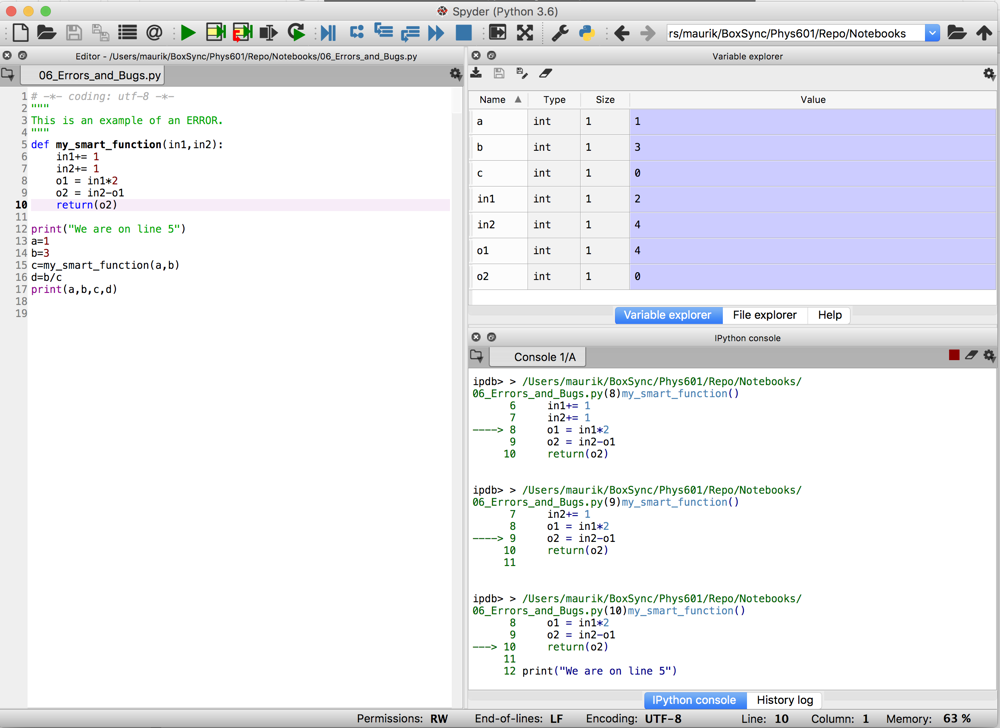

In [2]:
Image(filename="images/debugger.png")

With the blue controls you can now step through your code line by line. This allows you to see exactly how the program flows (where it goes in branches and function calls) and what your variables are when. 

Details on how to debug with Spyder are here: [Debugging](https://docs.spyder-ide.org/debugging.html)
Details on how to do this on the command line are here: [pdb debugger](https://docs.python.org/3/library/pdb.html) (The ipdb is almost the same, see [ipdb post](https://hasil-sharma.github.io/2017/python-ipdb/)

Getting good at debugging will take some learning. If you write a lot of code, it will be well worth your time and effort.

## Avoiding Errors

In coding, it is usually better to avoid errors and bugs in the first place. We all write buggy code, but if you make an effort, you can minimize the number of bugs and so save yourself a lot of time _debugging_.

### Coding best practices
* Keep It Simple, Stupid (KISS)
  * If there is a simple way to solve the problem, solve it the simple way. If _later_ you need to use fancy tricks to make the code go faster, then do that _later_ when it is needed, and keep the slow code as reference.
* Give variables, functions and modules meaningful sensible names. (Yes, that may mean more typing.)
* Test your code often. 
  * Write single lines, or just a few lines, and then test to see if these do what you expect.
  * Write specific test cases for your code.
* Try to not repeat code. Write a function to do those things you need more than once, then debug the function once (instead of many times.)
* When trying to see if your code does the right thing, vary the input:
  * Try different _scales_ (in discretization)
  * Try different limits for the input
* Comment all your code extensively. 
   * You may not find you have a bug until much later, and then you will want to know what your code did. 
   * This is also important when you email your code to someone to get help.

## Reporting Errors and Getting Help

If you cannot figure out what went wrong, you need to ask for help. When you do that, provide the person you are asking help from with _all_ the information so that they can reprodcue the problem. Don't just send the code and say "this doesn't work". Provide the details:
  * What code.
  * Where in the code you think the problem is.
  * The input to your code.
  * The expected behavior.
  * What erroneous behavior you observed.